# Decision Trees

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from abc import ABC, abstractmethod
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from graphviz import Digraph

### Load the data

In [31]:
# Read the CSV file.
data = pd.read_csv("task_1.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
print(data.shape)
print(data.head())

(2126, 22)
      LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  ...   Min    Max  \
0  120.0  0.0  0.0  0.0  0.0  0.0  0.0  73.0   0.5  43.0  ...  62.0  126.0   
1  132.0  4.0  0.0  4.0  2.0  0.0  0.0  17.0   2.1   0.0  ...  68.0  198.0   
2  133.0  2.0  0.0  5.0  2.0  0.0  0.0  16.0   2.1   0.0  ...  68.0  198.0   
3  134.0  2.0  0.0  6.0  2.0  0.0  0.0  16.0   2.4   0.0  ...  53.0  170.0   
4  132.0  4.0  0.0  5.0  0.0  0.0  0.0  16.0   2.4   0.0  ...  53.0  170.0   

   Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  NSP  
0   2.0     0.0  120.0  137.0   121.0      73.0       1.0  2.0  
1   6.0     1.0  141.0  136.0   140.0      12.0       0.0  1.0  
2   5.0     1.0  141.0  135.0   138.0      13.0       0.0  1.0  
3  11.0     0.0  137.0  134.0   137.0      13.0       1.0  1.0  
4   9.0     0.0  137.0  136.0   138.0      11.0       1.0  1.0  

[5 rows x 22 columns]


### Test different classifiers

In [5]:
# Dummy clf
clf = DummyClassifier(strategy='most_frequent')

# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for DummyClassifier:
{np.mean(cross_val_score(clf, Xtrain, Ytrain))}""")

Mean accuracy from 5-fold CV for DummyClassifier:
0.7805882352941176


In [6]:
# Decision tree clf
clf = DecisionTreeClassifier()

# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for Decisin tree classifier:
{np.mean(cross_val_score(clf, Xtrain, Ytrain))}""")

Mean accuracy from 5-fold CV for Decisin tree classifier:
0.9270588235294117


In [7]:
# Random forest clf
clf = RandomForestClassifier()

# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for Random forest classifier:
{np.mean(cross_val_score(clf, Xtrain, Ytrain))}""")

Mean accuracy from 5-fold CV for Random forest classifier:
0.9405882352941177


In [8]:
# Gradient boosting clf
clf = GradientBoostingClassifier()

# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for Gradient boosting classifier:
{np.mean(cross_val_score(clf, Xtrain, Ytrain))}""")

Mean accuracy from 5-fold CV for Gradient boosting classifier:
0.9488235294117647


In [14]:
# Logistics regression clf
clf = LogisticRegression(max_iter = 20000)

# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for Logistic regression classifier:
{np.mean(cross_val_score(clf, Xtrain, Ytrain))}""")

c:\Users\96noh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\96noh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Mean accuracy from 5-fold CV for Logistic regression classifier:
0.8911764705882353


In [10]:
# MLP clf
clf = MLPClassifier()

# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for MLP classifier:
{np.mean(cross_val_score(clf, Xtrain, Ytrain))}""")

Mean accuracy from 5-fold CV for MLP classifier:
0.8805882352941176


GradientBoosting classifier performed the best on the default settings. Therefore we will tune the hyperparameter settings for this classifier. It would be better to tune the hyperparameters for each single model before deciding which model to use, but this would be very computationally heavy for our computers.

### Hyperparameter tuning

In [11]:
params = [
    {"learning_rate":[0.05,0.1,0.2],
    "max_depth":[3,5,7],
    "n_estimators":[100,200,300]}]

clf = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=params, scoring = "accuracy", cv = 5)

clf_fit = clf.fit(Xtrain, Ytrain)

In [12]:
# Print the best parameters
print(f"Best params for GradientBoosting classifier: {clf_fit.best_params_}")

Best params for GradientBoosting classifier: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [13]:
# Run the model on test data with the best parameters
clf = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 3, n_estimators = 100)
clf.fit(Xtrain, Ytrain)

Yguess = clf.predict(Xtest)
print(f"Final accuracy on test data for our model: {accuracy_score(Ytest, Yguess)}")


Final accuracy on test data for our model: 0.9225352112676056


We selected the Gradientboost classifier and received an accuracy of approximately 92% on test data. We tuned the hyperparameter max_depth, learning rate and n_estimators. There are more hyperparameters you could tune but we decided these were enough for now. 

### Task 2

In [24]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [25]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [90]:
class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [91]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [92]:
from collections import Counter


class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [39]:
# Depth 2
cls_2 = TreeClassifier(max_depth=2)
# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for depth=2 classifier:
{np.mean(cross_val_score(cls_2, Xtrain, Ytrain))}""")

# Depth 3
cls_3 = TreeClassifier(max_depth=3)
# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for depth=3 classifier:
{np.mean(cross_val_score(cls_3, Xtrain, Ytrain))}""")

# Depth 4
cls_4 = TreeClassifier(max_depth=4)
# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for depth=4 classifier:
{np.mean(cross_val_score(cls_4, Xtrain, Ytrain))}""")

# Depth 6
cls_6 = TreeClassifier(max_depth=6)
# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for depth=6 classifier:
{np.mean(cross_val_score(cls_6, Xtrain, Ytrain))}""")

# Depth 8
cls_8 = TreeClassifier(max_depth=8)
# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for depth=8 classifier:
{np.mean(cross_val_score(cls_8, Xtrain, Ytrain))}""")

# Depth 10
cls_10 = TreeClassifier(max_depth=10)
# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for depth=10 classifier:
{np.mean(cross_val_score(cls_10, Xtrain, Ytrain))}""")

Mean accuracy from 5-fold CV for depth=2 classifier:
0.8911764705882353
Mean accuracy from 5-fold CV for depth=3 classifier:
0.9023529411764706
Mean accuracy from 5-fold CV for depth=4 classifier:
0.9105882352941176
Mean accuracy from 5-fold CV for depth=6 classifier:
0.9099999999999999
Mean accuracy from 5-fold CV for depth=8 classifier:
0.9099999999999999
Mean accuracy from 5-fold CV for depth=10 classifier:
0.9099999999999999


We can see from the Mean accuracy score above that the best performing model had depth=4.

In [41]:
# Run on test data
final_cls = TreeClassifier(max_depth = 4)
final_cls.fit(Xtrain, Ytrain)
# Predict
Yguess = final_cls.predict(Xtest)

print(f"Final accuracy on test data for tree model, max_depth=4: {accuracy_score(Ytest, Yguess)}")


Final accuracy on test data for tree model, max_depth=4: 0.8896713615023474


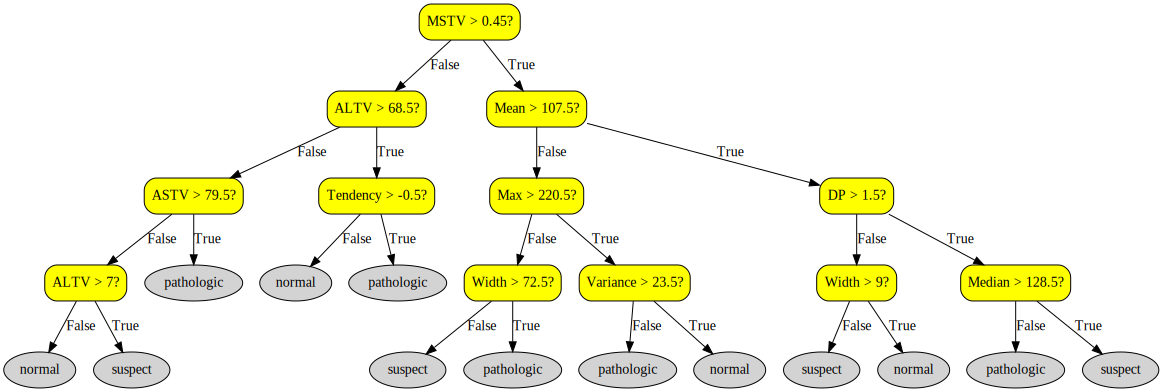

In [42]:
# Draw the tree
final_cls.draw_tree()

### Task 3

### Load the data

In [68]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

11619    16.266516
11300    14.667796
20241    15.830414
21320    15.943742
27572    15.438787
           ...    
30410    13.815511
10361    16.185754
10373    15.775605
27781    15.150512
30253    15.919645
Name: price_doc, Length: 13406, dtype: float64

In [69]:
print(alldata.shape)
print(alldata.head())

(16758, 8)
      price_doc  year  full_sq  life_sq  floor  num_room  kitch_sq  full_all
7672   10100000  2013       73     36.0   17.0       2.0      11.0    102828
8056    2750000  2013       11     11.0    2.0       1.0      12.0     75377
8135    9000000  2013       53     30.0   10.0       2.0       8.0     68630
8144    4457400  2013       41     37.0   13.0       1.0       1.0      9553
8153    7011550  2013       77     41.0    2.0       3.0      12.0      9553


### Test models

In [46]:
# Dummy regressor
m1 = DummyRegressor()
print(f"""Mean negative MSE from 5-fold CV for DummyRegressor:
{np.mean(cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

Mean negative MSE from 5-fold CV for DummyRegressor:
-0.38925247260237567


In [47]:
# Linear regression
m1 = LinearRegression()
print(f"""Mean negative MSE from 5-fold CV for Linear Regression:
{np.mean(cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

Mean negative MSE from 5-fold CV for Linear Regression:
-0.3013986588767236


In [48]:
# Lasso regressor
m1 = Lasso()
print(f"""Mean negative MSE from 5-fold CV for Lasso regressor:
{np.mean(cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

Mean negative MSE from 5-fold CV for Lasso regressor:
-0.3010470671748872


In [49]:
# Random forest regressor
m1 = RandomForestRegressor()
print(f"""Mean negative MSE from 5-fold CV for RandomForest regressor:
{np.mean(cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

Mean negative MSE from 5-fold CV for RandomForest regressor:
-0.2830200215609616


In [50]:
# GradientBoosting regressor
m1 = GradientBoostingRegressor()
print(f"""Mean negative MSE from 5-fold CV for GradientBoosting Regressor:
{np.mean(cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

Mean negative MSE from 5-fold CV for GradientBoosting Regressor:
-0.2645738267201068


In [51]:
# MLP regressor
m1 = MLPRegressor()
print(f"""Mean negative MSE from 5-fold CV for MLP Regressor:
{np.mean(cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

Mean negative MSE from 5-fold CV for MLP Regressor:
-61390.260850944185


GradientBoosting regressor performed the best on the default settings.

### Hyperparameter tuning

In [52]:
params = [
    {"learning_rate":[0.05,0.1,0.2],
    "max_depth":[3,5,7],
    "n_estimators":[100,200,300]}]

regressor = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=params, scoring = "neg_mean_squared_error", cv = 5)

regressor_fit = regressor.fit(Xtrain, Ytrain)

In [53]:
print(f"Best params for GradientBoosting regressor: {regressor_fit.best_params_}")

Best params for GradientBoosting regressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [54]:
# Run the model on test data with the best parameters
regressor = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, n_estimators = 300)
regressor.fit(Xtrain, Ytrain)

#Predict
Yguess = regressor.predict(Xtest)
print(f"Final MSE on test data for our model: {mean_squared_error(Ytest, Yguess)}")

Final MSE on test data for our model: 0.2613252989407654


We selected the Gradientboost regressor and received a MSE of approximately 0.26 on test data. We tuned the hyperparameter max_depth, learning rate and n_estimators. GradientBoosting performed the best both for the classification task and the regression task. 

### Task 4

### Step 1

In [172]:
# Class for TreeRegressor
class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, criterion='var_red'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'var_red':
            self.criterion_function = variance_reduction
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Y
        return np.mean(self.class_distribution)
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return np.var(self.class_distribution) < 0.1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)
        values_var = np.var(Y)

        low_ss = 0
        low_sum = 0

        high_ss = np.sum(np.array(Y)**2)
        high_sum = np.sum(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update
            low_ss += (y_i**2)
            low_sum += y_i

            high_ss -= (y_i**2)
            high_sum -= y_i

            

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            high_var = ((1/(n-i-1))*(high_ss))-((1/((n-i-1)**2))*(high_sum**2))
            low_var = ((1/(i+1))*(low_ss))-((1/((i+1)**2))*(low_sum**2))


            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(n, values_var, i+1, low_var, n-i-1, high_var)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None


        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [173]:
# Variance reduction function
def variance_reduction(n, values_var, n_low, low_var, n_high, high_var):
    return values_var-((n_low/n)*low_var)-((n_high/n)*high_var)

Mean squared error for depth=1: 0.009268460040512419


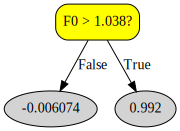

In [174]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y


X, Y = make_some_data(100)
cls = TreeRegressor(max_depth=1)
cls.fit(X, Y)
preds = cls.predict(X)
print(f"Mean squared error for depth=1: {mean_squared_error(preds, Y)}")
cls.draw_tree()

Mean squared error for depth=5: 0.009276899357538443


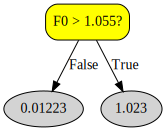

In [175]:
X, Y = make_some_data(100)
cls = TreeRegressor(max_depth=5)
cls.fit(X, Y)
preds = cls.predict(X)
print(f"Mean squared error for depth=5: {mean_squared_error(preds, Y)}")
cls.draw_tree()

### Step 2

To describe this data we would want a regression decision tree that can do a linear split. In our case, we would want a tree that checks if the X value is greater than 1 for the first node. 

We selected tree depth = 1 because we only need to check if X is greater than 1. However, the MSE for a tree with higher dept will be lower because the tree outputs a numerical value. If we have depth=1 we will only output two different values. For a tree with depth=2 this will instead be four values. 

When increasing the depth the plot becomes trickier to follow. However, we can see that it predicts the data slightly better. For generalization we believe it's better to only have depth=1.

### Step 3

We run CV for four different models with increasing depth. We choose the one with the best mean neg. MSE to run on the test data.

In [178]:
cls_2 = TreeRegressor(max_depth = 2)
print(f"""Mean negative MSE from 5-fold CV for Decision tree regressor depth=2:
{np.mean(cross_validate(cls_2, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")


cls_5 = TreeRegressor(max_depth = 5)
print(f"""Mean negative MSE from 5-fold CV for Decision tree regressor depth=5:
{np.mean(cross_validate(cls_5, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

cls_7 = TreeRegressor(max_depth = 7)
print(f"""Mean negative MSE from 5-fold CV for Decision tree regressor depth=7:
{np.mean(cross_validate(cls_7, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

cls_10 = TreeRegressor(max_depth = 10)
print(f"""Mean negative MSE from 5-fold CV for Decision tree regressor depth=10:
{np.mean(cross_validate(cls_10, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"])}""")

Mean negative MSE from 5-fold CV for Decision tree regressor depth=2:
-0.3043367605680851
Mean negative MSE from 5-fold CV for Decision tree regressor depth=5:
-0.282804050256642
Mean negative MSE from 5-fold CV for Decision tree regressor depth=7:
-0.28269271168147114
Mean negative MSE from 5-fold CV for Decision tree regressor depth=10:
-0.30638166539002526


In [179]:
# Run best performing tree on test data
cls = TreeRegressor(max_depth = 7)
cls.fit(Xtrain, Ytrain)
preds = cls.predict(Xtest)
print(f"Mean squared error on test data with depth=10: {mean_squared_error(Ytest, preds)}")

Mean squared error on test data with depth=10: 0.2903456812456766


We can see from above that neg. MSE was best for depth=7, but barely. Therefore we decided to use that model for our test data.
We received a MSE of 0.29 on our test data.

### Step 4

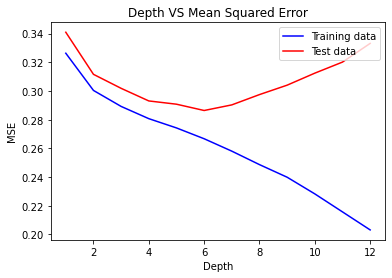

In [180]:
# Plot underfitting/overfitting
train_scores = []
test_scores = []
depth = np.arange(1,13)

for i in range(0,12):
    tree_regressor =TreeRegressor(max_depth=i+1)
    tree_regressor.fit(Xtrain, Ytrain)
    tree_regressor.draw_tree()

    score = mean_squared_error(Ytrain, tree_regressor.predict(Xtrain))
    train_scores.append(score)

    score = mean_squared_error(Ytest, tree_regressor.predict(Xtest))
    test_scores.append(score)
    

plt.plot(depth, train_scores, color='blue', label='Training data')
plt.plot(depth, test_scores, color='red', label='Test data')
plt.legend(loc="upper right")
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.title('Depth VS Mean Squared Error')
plt.show()

We can see that the curve for test data is decreasing up until depth 8/9 when it instead starts to increase. The curve for the training data however is decreasing over all depths. This indicates that the model is starting to overfit to the training data around depth 8/9.

If the curve for the test data decreased as well when the depth increased, the model would porbably not be overfit. But this is not the case now. 